# Gewöhnliche Differentialgleichungen numerisch mit Python lösen
S. Mack, 12.8.2019

Folgende Definition von "gewöhnlichen Differentialgleichungen" findet sich in Wikipedia:
>Zitat: "Eine gewöhnliche Differentialgleichung (oft abgekürzt mit GDGL oder ODE, englisch ordinary differential equation) ist eine Differentialgleichung, bei der zu einer gesuchten Funktion nur Ableitungen nach genau einer Variablen auftreten.
Die meisten dynamischen Vorgänge in unserer realen Welt wie Bewegung, Zerfall, Änderung usw. können als ein mathematisches Modell oder als ein dynamisches System mit mindestens einem Eingang und mindestens einem Ausgang durch eine Differentialgleichung definiert werden. Alternativ kann das Modell je nach Aufgabenstellung anstelle eines Systemeingangs durch Anfangswerte (Anfangswertproblem) oder Randwerte (Randwertproblem) bestimmt werden.
Viele physikalische, chemische und biologische Vorgänge in der Natur lassen sich mit solchen Gleichungen mathematisch beschreiben, z. B. der radioaktive Zerfall, Bewegungsvorgänge von Körpern, viele Arten von Schwingungsvorgängen oder das Wachstumsverhalten von Tier-Populationen. In naturwissenschaftlichen Modellen werden gewöhnliche Differentialgleichungen daher häufig eingesetzt, um solche Vorgänge zu analysieren, zu simulieren oder um Vorhersagen abgeben zu können."   

Dieser Definition ist nichts hinzu zu fügen. Wie im oben zitierten [Wikipediaartikel zu GDGL](https://de.wikipedia.org/wiki/Gewöhnliche_Differentialgleichung) nachzulesen ist es oft recht kompliziert und manchmal auch prinzipiell unmgölich, eine analytische Lösung einer GDGL zu finden.  
Wesentlich einfacher ist das *numerische* Lösen einer GDGL, da es dazu fertige Bibliotheken für die verschiedenen Programmiersprachen wie C, MATLAB oder Python gibt, die auf schon lange bewährten Algorithmen basieren.

## Gewöhnliche Differentialgleichungen (GDGL) in Python
Eine GDGL "ersten Grades" hat mathematisch die Form
$$ \frac{d}{dt}y=f(t, y, c) $$  

Hier repräsentiert $y$ die abhängige Variable (z.B. das Ausgangssignal einer elektronischen Schaltung) und  $c$ eine Konstante (z.B. die Kapazität).  
$f()$ steht für eine beliebige Funktion und $t$ ist die uabhängige Variable (z.B. die Zeit). Der Begriff "ersten Grades" besagt, dass nur die erste Ableitung von $y$ in der Differentialgleichung (DGL) vorkommt.

Ein Beispiel hierfür ist folgende GDGL, welche später im Abschnitt "Verwendung des Solvers ``solve_ivp`` aus ``scipy.integrate`` für eine GDGL ersten Grades" im Beispielcode numerisch gelöst wird:  
$$\frac{d}{dt}y=f(y,t,c) = c \cos(3t) - y / 4 $$

Allgemein betrachtet man in der Mathematik und speziell auch beim numerischen Lösen von GDGL **Systeme von Differenzialgleichungen**. Ein solches System ersten Grades wird durch fast die selbe allgemeine Gleichung wie oben beschrieben:
$$ \frac{d}{dt}\mathbf{y} =\mathbf{f}(t, \mathbf{y}, \mathbf{c}) $$


Hier repräsentiert jedoch ganz allgemein $\mathbf y$ ein *Array* von abhängigen Variablen und $\mathbf c$ ein *Array* von Konstanten.   
$\mathbf f()$ steht für eine Funktion, welche nun auch ein *Array* zurück gibt. Die (eine) unabhängige Variable $t$ ist nach wie vor ein Skalar. 
>Einen Array erkennt man daran, dass dessen Symbol **fettgedruckt** ist.   

Die skalare GDGL oben lässt sich nun auch in Array-Form schreiben, wobei $\mathbf y$, $\mathbf f()$ und $\mathbf c$ hierbei  Arrays mit jeweils nur einem einzigen Element mit Index 0 darstellen: 
$$\frac{d}{dt}y_0=f_0(\mathbf y,t,\mathbf c) = c_0 \cos(3t) - y_0 / 4 \qquad 
y_0 \equiv {\mathbf y}[0], \: c_0 \equiv {\mathbf c}[0], \: f_0() \equiv {\mathbf f()}[0]$$


>Meistens hat man es mit GDGL höheren Grades zu tun - also mit höheren Ableitungen. Eine solche GDGL kann aber immer in ein Gleichungssystem aus mehreren GDGL ersten Grades umgeformt werden.  

** Die obige allgemeine GDGL $\frac{d}{dt}\mathbf{y} =\mathbf{f}(t, \mathbf{y}, \mathbf{c}) $  repräsentiert genau ein solches Gleichungssystem:**  

>Die Größen $\frac{d}{dt}\mathbf y$, $\mathbf y$, $\mathbf c$ und $\mathbf {f}()$ sind dann tatsächlich Arrays mit mehreren Elementen - jedes Element repräsentiert eine Zeile des Gleichungssystems, also eine GDGL erster Ordnung.  

Bei einer GDGL zweiten Grades besteht dieses Gleichungssystem aus zwei GDGL ersten Grades, bei einer GDGL m-ten Grades aus m GDGL ersten Grades. Das Umformen einer GDGL m-ten Grades in m GDGL ersten Grades nennt man "Kaskadieren".  

Als Beispiel ist nachfolgend dargestellt, wie die GDGL dritten Grades 
$\frac{d^3}{dt^3}y=f(t, y, c)=y + 3\frac{d}{dt}y+y $ in drei GDGL ersten Grades kaskadiert wird: 

\begin{align}
\frac{d}{dt}y_0 &= y_1  &\longrightarrow \frac{d}{dt}y_0 &= y_1\\
\frac{d}{dt}y_1 &= \frac{d^2}{dt^2}y_0 = y_2 &\longrightarrow \frac{d}{dt}y_1&=y_2\\
\frac{d}{dt}y_2 &= \frac{d^2}{dt^2}y_1 = \frac{d^3}{dt^3}y_0=3y_1 + y_0 &\longrightarrow \frac{d}{dt}y_2 &= 3y_1 + y_0\\
\end{align}  

Das System aus drei GDGL ersten Grades steht rechts von den Pfeilen.  
Der abhängige Variable $\mathbf y$ in der Funktion $\mathbf{f}(t, \mathbf{y}, \mathbf{c})$ ist also ein Array mit den Elementen $[y,\frac{d}{dt}y,\frac{d^2}{dt^2}y]$.  
Die Funktion selbst ist das Array $\mathbf{f}(t, \mathbf{y}, \mathbf{c}) = [y_1, y_2, 3y_1 + y_0]$. Die unabhängige Variable $t$ sowie der Parameter $\mathbf c$ sind in diesem speziellen Beispiel übrigens keine Variablen der Funktion $\mathbf{f}()$.

Das Pythonmodul ``SciPy`` stellt die beiden Slover ``odeint`` und ``solve_ivp`` für das numerische Lösen von GDGL bereit. Nachfolgend wird für beide Solver jeweils eine GDGL ersten und zweiten Grades mit einem Beispielquellcode numerisch gelöst. 

## Verwendung des Solvers ``odeint`` aus ``scipy.integrate``
Dabei ist ``odeint`` der ältere Solver, welcher stark an MATLAB angelehnt ist. Laut den [SciPy.org-Seiten für odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) sollte dieser Solver für neue Projekte nicht mehr verwendet sondern durch den Solver ``solve_ivp`` ersetzt werden.  

Wie immer gibt es aber noch viele gute Literatur zu "vergangener" Software, weshalb hier beide Solver vorgestellt werden.

### Verwendung des Solvers ``odeint`` aus ``scipy.integrate`` für eine GDGL ersten Grades
Als Beispiel wird hier die DGL eines PT1-Systems numerisch gelöst. Ein PT1-System ist z.B. ein Messsystem erster Ordnung, wie es im Buch "Elektrische Messtechnik" von T. Mühl erklärt wird.  

Ein solches System gehorcht der GDGL
$$ x_a(t) + T \frac{d}{dt}x_a(t) = E x_e(t)$$  

Dabei ist $x_e$ das Eingangssignal, $x_a$ das Ausgangssignal, $E$ die Empfindlichkeit und $T$ die Zeitkonstante des Messsystems.  

Hier ist $\mathbf y(t) \equiv x_a(t)$ die abhängige Variable und $\mathbf f(\mathbf y,t, \mathbf c) \equiv f(y,t,E,T) = (E x_e(t) - y)/T$.  
Sowohl $\mathbf y$, $\mathbf c$ als auch $\mathbf f()$ sind hier zwar formal Arrays, jedoch ist nur das nullte Element des jeweiligen Arrays von Interesse. D.h. streng genommen ist mit $\mathbf y(t)$ der Wert ${y_0}(t)$ bzw. mit $\mathbf f(\mathbf y,t,E,T)$ der Wert ${f_0}(y_0,t,E,T)$ gemeint.  

Für die numerische Lösung der GDGL muss nun noch das Eingangssignal als Funktion der Zeit angegeben werden. Im folgenden Beispiel ist das Eingangssignal eine Rampenfunktion ``xe()``, welche zuerst den Wert Null besitzt und dann innerhalb der Zeitspanne zwischen ``t_start`` und ``t_stopp`` auf den Wert Eins anwächst. Damit ist die Funktion $\mathbf f()$ eindeutig bestimmt.  
Weiter wird für die numerische Lösung noch ein Anfangswert ``y_init`` vom Ausgangssignal $y_0$ benötigt.  

Anschaulich ist $x_e(t)$ beispielsweise ein Sensorsignal eines Abstands, der sich zwischen ``t_start`` und ``t_stopp`` von 0 m auf 1 m ändert. $y_0(t) \equiv x_a(t)$ ist der angezeigte Abstandswert auf einem Display, welcher dem wahren Abstand hinterher hinkt, weil der Sensoreingang der Auswerteelektronik eine sehr hohe Kapazität besitzt.

Verwendete Koeffizienten xa(t) + T d/dt xa(t) = E xe(t)
E: 2.0
T: 1.5


Text(13,0.7,'Ende Anstieg Sensorsignal')

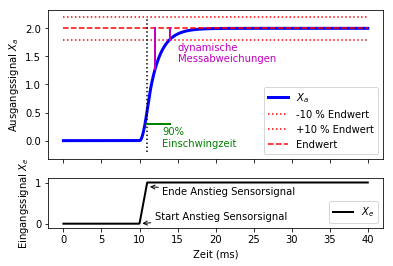

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

ns = 1000 # number of time samples
y_init = 0 # initial value of y=xa
t = np.linspace(0,40,ns) # sampling time values
# input signal xe starts with 0 and ramps to 1
t_start = 10 # ramp start time of xe
t_stopp = 11 # ramp stopp time of xe

E = 2.0 # sensitivity
T = 1.5 # time constant 

def func_f(y,t,E,T): # function f() of ODE dy/dt=f(y,t,E,T), y stands for output signal xa
    dydt = (E*xe(t,t_start,t_stopp)-y)/T
    return dydt


def xe(t,t_start,t_stopp): # input signal function of time, ramp function
    if t<t_start: 
        x = 0
    elif t<t_stopp:
        x = (t-t_start)/(t_stopp-t_start)
    else:
        x = 1
    return x

xe_vals = np.zeros(ns) # create input signal only for plotting
for index,time in enumerate(t):
    xe_vals[index] = xe(t[index],t_start,t_stopp)

# numerical solving of ODE with initial value y0. args must be a tuple,
# hence a period must be placed after T to be interpreted as tuple.
# only the first column [:,0] of the result is used, since it is not a system of ODEs
xa_vals = odeint(func_f,y_init,t,args=(E,T,))[:,0]

print('Verwendete Koeffizienten xa(t) + T d/dt xa(t) = E xe(t)')
print('E: ' + str(E))
print('T: ' + str(T))

#-----------------------------------------------------------------------------
#----plotting results
#-----------------------------------------------------------------------------
ap = {'arrowstyle': '->'} # design of arrows
fig, ax =plt.subplots(2,1, sharex='col', gridspec_kw={'height_ratios': [3, 1]})

#----------------------output signal xa
ax[0].plot(t,xa_vals,'b-',linewidth=3,label='$X_a$')
ax[0].set_ylabel('Ausgangssignal $X_a$')
# steady state value and +/-10 % error limits
ax[0].plot([0,max(t)],[E*0.9,E*0.9],'r:',label='-10 % Endwert')
ax[0].plot([0,max(t)],[E*1.1,E*1.1],'r:',label='+10 % Endwert')
ax[0].plot([0,max(t)],[2,2],'r--',label='Endwert')
# end rise input signal
ax[0].plot([t_stopp,t_stopp],[-0.2,2.2],'k:')
# 90% rise Time
tloc = (13,-0.1)
txt = '90%\nEinschwingzeit'
ax[0].annotate(s=txt,xy=tloc, color='g')
ax[0].plot([t_stopp,14],[0.3,0.3],'g-',linewidth=2)
# dynamic errors
ax[0].plot([14,14],[E*0.9,E],'m-',linewidth=2)
ax[0].plot([12,12],[1.28,E],'m-',linewidth=2)
tloc = (15,1.4)
txt = 'dynamische\nMessabweichungen'
ax[0].annotate(s=txt,xy=tloc, color='m')
ax[0].legend(loc=4)

#----------------------input signal xe
ax[1].plot(t,xe_vals,'k',linewidth=2, label='$X_e$')
ax[1].set_ylim([-0.1,1.1])
ax[1].legend(loc='lower right')
ax[1].set_ylabel('Eingangssignal $X_e$')
ax[1].set_xlabel('Zeit (ms)')

pt = (t_start + 0.1,0.0)
tloc = (t_start + 2,0.1)
txt = 'Start Anstieg Sensorsignal'
ax[1].annotate(s=txt,xy=pt,xytext=tloc,arrowprops=ap)

pt = (t_stopp + 0.1,0.9)
tloc = (t_stopp + 2,0.7)
txt = 'Ende Anstieg Sensorsignal'
ax[1].annotate(s=txt,xy=pt,xytext=tloc,arrowprops=ap)

Beim Codebeispiel oben ist das numerische Lösen der GDGL übrigens der kleinste Teil: 
1. Zuerst wird der Anfangswert ``y_init`` festgelegt.
2. Dann werden die Stützstellen von $t$ für die numerische Lösung als Array erzeugt. 
3. Dann wird die Funktion $f_0(y_0,t,E,T)$ alias ``func_f()`` definiert, in die die Rampenfunktion des Eingangssignals eingeht.
4. Schließlich wird mit der Funktion ``odeint(func_f,y_init,t,args=(E,T,))`` eine Matrix erzeugt, in deren ersten Spalte sich die y-Werte, also die Ausgangsignalwerte befinden.  

Der weitaus größte Teil des Quellcodes oben dient der grafischen Darstellung.

### Verwendung des Solvers ``odeint`` aus ``scipy.integrate`` für eine GDGL zweiten Grades
Als Beispiel wird hier die DGL eines PT2-Systems numerisch gelöst. Ein PT2-System ist z.B. ein Messsystem zweiter Ordnung, wie es im Buch "Elektrische Messtechnik" von T. Mühl erklärt wird.  
Ein solches System gehorcht der GDGL
$$ T^2 \frac{d^2}{{dt}^2} x_a(t) + 2DT \frac{d}{dt}x_a(t) + x_a(t) = E x_e(t)$$  

Dabei ist $x_e$ das Eingangssignal, $x_a$ das Ausgangssignal, $E$ die Empfindlichkeit, $D$ der Dämpfungsgrad und $T$ die Zeitkonstante des Messsystems.  
Nun sind $\mathbf y(t)$ sowie $\mathbf f(\mathbf y,t,E,T,D)$ nicht mehr nur formal sondern tatsächlich Arrays:  

Wie oben erwähnt, wird eine GDGL zweiten Grades als ein Gleichungssystem zweier GDGL ersten Grades dargestellt. Somit gilt  

$$y_0(t) \equiv x_a(t) \qquad  y_1(t) = \frac{d}{dt}y_0(t) \equiv \frac{d}{dt} x_a(t)$$

Isoliert man bei der obigen GDGL des PT2-Systems den Term $\frac{d^2}{{dt}^2} y$ auf die linke Seite, so ergibt sich:

$$ \frac{d^2}{{dt}^2} y_0  = \frac{E x_e(t)}{T^2} - \frac{2D}{T} \frac{d}{dt}y_0 - \frac{1}{T} y_0
= \frac{E x_e(t)}{T^2} - \frac{2D}{T} y_1 - \frac{1}{T} y_0
$$

Für die Funktion $\mathbf f()$ gilt somit: 

$$
\begin{aligned}
f_0(\mathbf y,t,E,T,D) &= \frac{d}{dt}y_0 = y_1 \\ 
f_1(\mathbf y,t,E,T,D) &= \frac{d^2}{{dt}^2} y_0=\frac{E x_e(t)}{T^2} - \frac{2D}{T} y_1 - \frac{1}{T} y_0
\end{aligned}
$$

Letzlich werden die obigen Gleichungen im folgendem Gleichungssystem aus zwei GDGL ersten Grades zusammengefasst:

$$
\begin{aligned}
\frac{d}{dt}y_0 &= y_1 \\
\frac{d}{dt}y_1 &= \frac{E x_e(t)}{T^2} - \frac{2D}{T} y_1 - \frac{1}{T} y_0
\end{aligned}
$$

Für die numerische Lösung dieses Systems aus GDGL ersten Grades wird als Eingangssignal wieder die selbe Rampenfunktion ``xe()`` wie im vorherigen Abschnitt verwendet.  
Weiter wird für die numerische Lösung noch ein Anfangswert ``y_init`` vom Ausgangssignal y benötigt. Dieser Anfangswert ist nun auch ein Array mit zwei Elementen, dem Startwert und der "Startänderung". Beides wird im folgenden Codebeispiel gleich Null angenommen. 

Anschaulich ist $x_e(t)$ beispielsweise wieder das Sensorsignal eines Abstands, der sich zwischen ``t_start`` und ``t_stopp`` von 0 m auf 1 m ändert. $y_0(t) \equiv x_a(t)$ ist der angezeigte Abstandswert auf einem Display, welcher zuerst dem wahren Abstand hinterher hinkt, danach überschwingt und schließlich sich einpendelt. So würde sich eine Auswerteelektronik am Sensorausgang verhalten, die eine sehr hohe Kapazität gepaart mit einer Induktivität besitzt.

Verwendete Koeffizienten T² d²/dt² xa + 2 D T d/dt xa + xa = E xe (t)
E: 2.0
T: 0.5
D: 0.3


Text(13,0.7,'Ende Anstieg Sensorsignal')

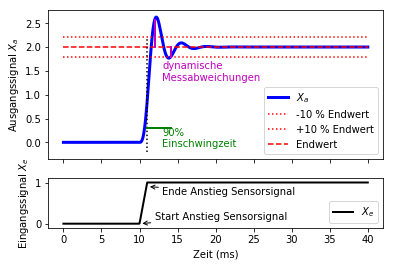

In [2]:
ns = 1000 # number of time samples
y_init = [0,0] # initial values of y=xa and dy/dt=dxa/dt
t = np.linspace(0,40,ns) # sampling time values
# input signal xe starts with 0 and ramps to 1
t_start = 10 # ramp start time of xe
t_stopp = 11 # ramp stopp time of xe

E = 2.0 # sensitivity
T = 0.5 # time constant
D = 0.3 # damping constant

def func_f(y_array,t,E,T,D): # function f() (array) of ODE system
    y,dydt = y_array # elements of y_array are y and dy/dt
    dy2dt2 = E * xe(t,t_start,t_stopp)/T**2 - 2.0*D/T*dydt - y/T**2 
    return [dydt,dy2dt2]

def xe(t,t_start,t_stopp): # input signal function of time, ramp function
    if t<t_start: 
        x = 0
    elif t<t_stopp:
        x = (t-t_start)/(t_stopp-t_start)
    else:
        x = 1
    return x

xe_vals = np.zeros(ns) # create input signal only for plotting
for index,time in enumerate(t):
    xe_vals[index] = xe(t[index],t_start,t_stopp)

# numerical solving of ODE with initial value array y0. args must be a tuple,
# hence periode must be placed after D to be interpreted as tuple.
# the first column of the result is xa, the second d/dt xa
xa_vals = odeint(func_f,y_init,t,args=(E,T,D,))[:,0]

print('Verwendete Koeffizienten T² d²/dt² xa + 2 D T d/dt xa + xa = E xe (t)')
print('E: ' + str(E))
print('T: ' + str(T))
print('D: ' + str(D))

#-----------------------------------------------------------------------------
#----plotting results
#-----------------------------------------------------------------------------
ap = {'arrowstyle': '->'} # design of arrows
fig, ax =plt.subplots(2,1, sharex='col', gridspec_kw={'height_ratios': [3, 1]})

#----------------------output signal xa
ax[0].plot(t,xa_vals,'b-',linewidth=3,label='$X_a$')
ax[0].set_ylabel('Ausgangssignal $X_a$')
# steady state value and +/-10 % error limits
ax[0].plot([0,max(t)],[E*0.9,E*0.9],'r:',label='-10 % Endwert')
ax[0].plot([0,max(t)],[E*1.1,E*1.1],'r:',label='+10 % Endwert')
ax[0].plot([0,max(t)],[2,2],'r--',label='Endwert')
# end rise input signal
ax[0].plot([t_stopp,t_stopp],[-0.2,2.2],'k:')
# 90% rise Time
tloc = (13,-0.1)
txt = '90%\nEinschwingzeit'
ax[0].annotate(s=txt,xy=tloc, color='g')
ax[0].plot([t_stopp,14.2],[0.3,0.3],'g-',linewidth=2)
# dynamic errors
ax[0].plot([14.14,14.14],[E*0.9,E],'m-',linewidth=2)
ax[0].plot([12,12],[E,2.57],'m-',linewidth=2)
tloc = (13,1.3)
txt = 'dynamische\nMessabweichungen'
ax[0].annotate(s=txt,xy=tloc, color='m')
ax[0].legend(loc=4)

#----------------------input signal xe
ax[1].plot(t,xe_vals,'k',linewidth=2, label='$X_e$')
ax[1].set_ylim([-0.1,1.1])
ax[1].legend(loc='lower right')
ax[1].set_ylabel('Eingangssignal $X_e$')
ax[1].set_xlabel('Zeit (ms)')

pt = (t_start + 0.1,0.0)
tloc = (t_start + 2,0.1)
txt = 'Start Anstieg Sensorsignal'
ax[1].annotate(s=txt,xy=pt,xytext=tloc,arrowprops=ap)

pt = (t_stopp + 0.1,0.9)
tloc = (t_stopp + 2,0.7)
txt = 'Ende Anstieg Sensorsignal'
ax[1].annotate(s=txt,xy=pt,xytext=tloc,arrowprops=ap)

Beim Codebeispiel oben ist das numerische Lösen der GDGL wieder der kleinste Teil. Die Vorgehensweise ist gleich wie für die GDGL ersten Grades mit dem einzigen Unterschied, dass ``y_init`` und ``func_f()`` nun Arrays sind:
1. Zuerst werden die beiden Anfangswerte ``y_init`` festgelegt.
2. Dann werden die Stützstellen von $t$ für die numerische Lösung als Array erzeugt. 
3. Dann wird die Funktion $\mathbf f(\mathbf y,t,E,T)$ alias ``func_f()`` definiert, in die die Rampenfunktion des Eingangssignals eingeht. Sie erhält ein Zweier-Array übergeben und gibt auch wieder ein Zweier-Array $\mathbf y$ aus, in dem die erste und zweite Ableitung von $y_0$ stehen.
4. Schließlich wird mit der Funktion ``odeint(func_f,y_init,t,args=(E,T,))`` eine Matrix erzeugt, in deren ersten Spalte, sich die $y_0$-Werte also die Ausgangsignalwerte $x_a$befinden. In der zweiten Spalte, die hier nicht dargestellt wird, befinden sich die $y_1$-Werte - also $\frac{d}{dt} x_a$.  

Der weitaus größte Teil des Quellcodes oben dient wie gehabt der grafischen Darstellung.

## Verwendung des Solvers ``solve_ivp`` aus ``scipy.integrate``
Im Gegensatz zum Solver ``odeint`` können bei ``solve_ivp`` im Argument für die Funktion $\mathbf f()$ keine Parameter $\mathbf c$ übergeben werden.  
Als work around wird bei ``solve_ivp`` daher eine Lambda-Funktion mit Argumenten $t$ und $\mathbf y$ quasi als Wrapper für die eigentliche Funktion $\mathbf f(\mathbf y,t,\mathbf c)$ verwendet. Ansonsten ist die Verwendung dieses Solvers recht ähnlich zu ``odeint``. Trotzdem ist aber ein Blick in die [SciPy.org-Seiten für solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) sehr hilfreich, zumal dieser Solver anders als ``odeint`` objektorientiert konzipiert ist.  

Auf dieser [Webseite der Duke University](http://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples) finden sich sehr gut dokumentierte Beispiele für die Verwendung des Solvers ``solve_ivp``, auf denen auch die nachfolgend dargestellten Codebeispiele basieren.  

### Verwendung des Solvers ``solve_ivp`` aus ``scipy.integrate`` für eine GDGL ersten Grades
Im folgenden Beispielcode wird die GDGL 
$$ \frac{d}{dt}x_a = c x_e(t) - x_a / 4, \:  x_e(t) = \cos(3t) \qquad \frac{d}{dt}y_0 = c \cos(3t) - y_0 / 4$$
numerisch für $c = 5$ gelöst.

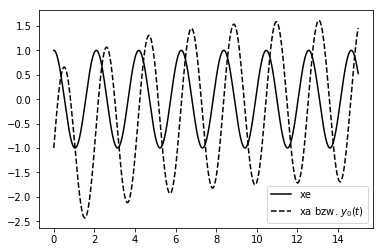

In [3]:
from scipy.integrate import solve_ivp

def xe(t): # input signal function of time, cosine oscillation
    return np.cos(3 * t)

def func_f(y, t, c): # function f() of ODE
    dydt = c * xe(t) - y / 4
    return dydt

tspan = np.linspace(0, 15, 1000) # sampling time values
y_init = [-1] # initial value of y

# numerical solving of ODE, solve_ivp() only accepts f(y,t) hence lambda function work around
sol = solve_ivp(lambda t, y: func_f(y, t, c=5), [tspan[0], tspan[-1]], y_init, t_eval=tspan)

#-----------------------------------------------------------------------------
#----plotting results
#-----------------------------------------------------------------------------
x_vals = np.zeros(np.size(sol.t))
for index,time in enumerate(sol.t):
    x_vals[index] = xe(time)
fig, ax = plt.subplots(num=1)
ax.plot(sol.t, xe(sol.t), 'k-', label='xe')
ax.plot(sol.t, sol.y[0,:], 'k--', label='xa bzw. $y_0(t)$')
ax.legend(loc='best')

### Verwendung des Solvers ``solve_ivp`` aus ``scipy.integrate`` für eine GDGL zweiten Grades
Dieses Quellcodebeispiel löst die selbe PT2-Differentialgleichung wie das entsprechende Beispiel oben für den ``odeint``-Solver. Als Eingangssignal wird hier eine Stufenfunktion statt einer Rampenfunktion verwendet.  
Die GDGL zweiter Ordnung wird genau so wie zuvor in zwei DGLs erster Ordnung "kaskadiert", welche in die Funktion ``func_f()`` eingehen.

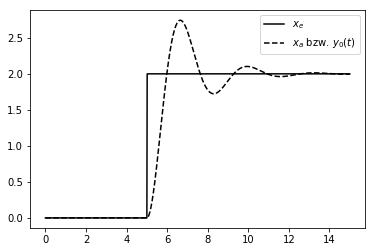

In [4]:
def xe(t): # input signal function of time, step function
    x = 0
    if (t>5):
        x = 2
    return x

def func_f(t, y_array, E,T,D): # function f() (array) of ODE system
    y,dydt = y_array
    dy2dt2 = E/T**2 * xe(t) - 2.0*D/T * dydt - 1/T**2 * y
    return [dydt,dy2dt2]

tspan = np.linspace(0, 15, 1000) # sampling time values
y_init = [0,0] # initial values of array y

# numerical solving of ODE, solve_ivp() only accepts f(y,t) hence lambda function work around
sol = solve_ivp(lambda t, y_array: func_f(t, y_array, E=1.0, T=0.5, D=0.3), [tspan[0], tspan[-1]], y_init, t_eval=tspan)

#-----------------------------------------------------------------------------
#----plotting results
#-----------------------------------------------------------------------------
x_vals = np.zeros(np.size(sol.t))
for index,time in enumerate(sol.t):
    x_vals[index] = xe(time) 

fig, ax = plt.subplots()
ax.plot(sol.t, x_vals, 'k-', label='$x_e$')
ax.plot(sol.t, sol.y[0,:], 'k--', label='$x_a$ bzw. $y_0(t)$')
ax.legend(loc='best')